<a href="https://colab.research.google.com/github/riskydevandra/Neural-Network-Deep-learning/blob/main/M10_nndl_tugaskelompok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NNDL Tugas Kelompok**

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Config

In [ ]:
# Config
epochs = 200
batch_size = 50
validation_split = 0.1
num_neuron = 1
random_state = 7
# opt = tf.keras.optimizers.Adam(learning_rate=0.01)
opt = tf.keras.optimizers.experimental.SGD(learning_rate=0.01)
loss = tf.keras.losses.KLDivergence()

## Data Understanding

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset
# data = pd.read_csv("/content/ionosphere.csv",delimiter=",")
data = pd.read_csv("/content/drive/MyDrive/nndl/ionosphere.csv",delimiter=",") 

In [ ]:
# Mengecek jumlah baris dan kolom dataset
print(f'Jumlah baris pada dataset : {data.shape[0]}')
print(f'Jumlah kolom pada dataset : {data.shape[1]}')

Jumlah baris pada dataset : 351
Jumlah kolom pada dataset : 35


In [ ]:
# Menampilkan 10 data teratas
data.head(10)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
5,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b
6,1,0,0.97588,-0.10602,0.94601,-0.20800,0.92806,-0.28350,0.85996,-0.27342,...,-0.81634,0.13659,-0.82510,0.04606,-0.82395,-0.04262,-0.81318,-0.13832,-0.80975,g
7,0,0,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,...,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,b
8,1,0,0.96355,-0.07198,1.00000,-0.14333,1.00000,-0.21313,1.00000,-0.36174,...,-0.65440,0.57577,-0.69712,0.25435,-0.63919,0.45114,-0.72779,0.38895,-0.73420,g
9,1,0,-0.01864,-0.08459,0.00000,0.00000,0.00000,0.00000,0.11470,-0.26810,...,-0.01326,0.20645,-0.02294,0.00000,0.00000,0.16595,0.24086,-0.08208,0.38065,b


In [ ]:
# Mengecek jumlah data yg missing value
print(data.isnull().sum())

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64


In [ ]:
# Menampilkan informasi pada dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [ ]:
# Menampilkan deskripsi statistik pada dataset
data.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


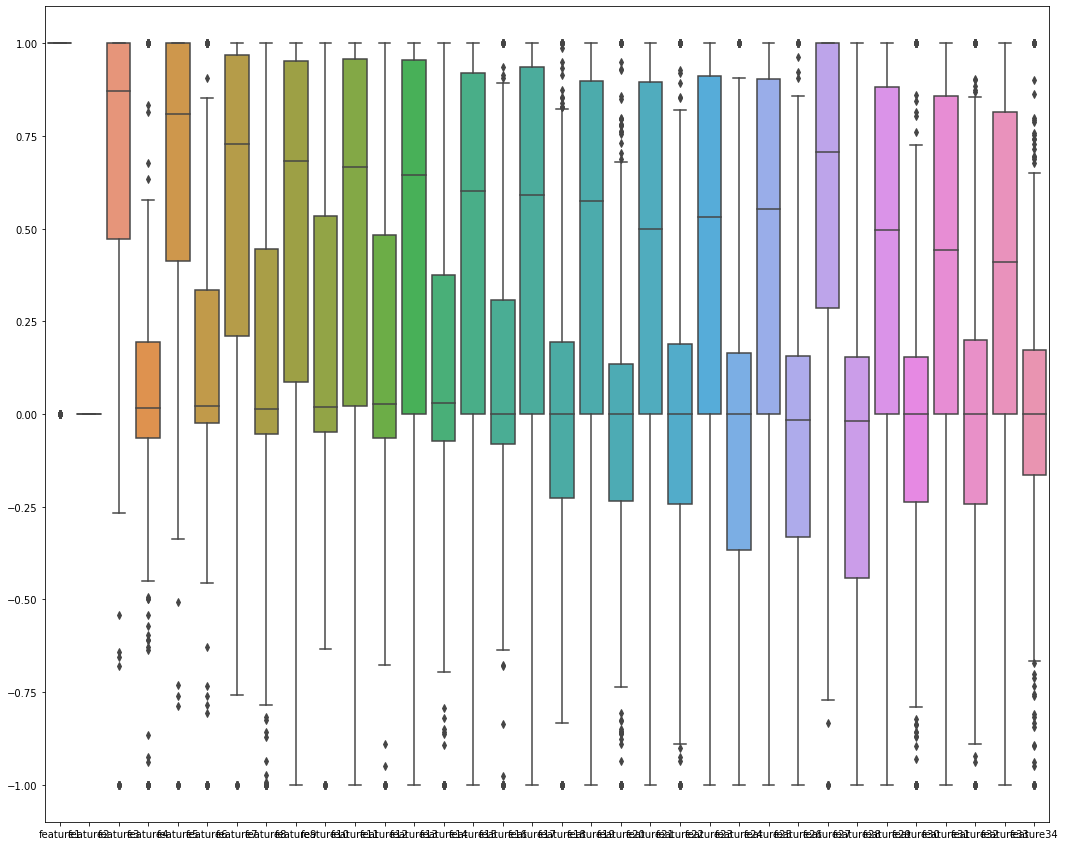

In [ ]:
plt.figure(figsize=(18,15))
sns.boxplot(data=data)

## Data Preparation

In [ ]:
# Mengubah label menjadi menjadi angka 0 & 1
data['label'].replace('b', 0, inplace = True)   
data['label'].replace('g', 1, inplace = True)

In [ ]:
# Memisahkan dataset menjadi train dataset & test dataset

x = data.values[0:,0:34].astype(float)
y = data.values[0:,34]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4301, random_state=random_state)

In [ ]:
# Mengecek jumlah train datset
print(f'Jumlah baris pada x_train dataset : {x_train.shape[0]}')
print(f'Jumlah baris pada y_train dataset : {y_train.shape[0]}')

Jumlah baris pada x_train dataset : 200
Jumlah baris pada y_train dataset : 200


In [ ]:
# Mengecek jumlah test datset
print(f'Jumlah baris pada x_test dataset : {x_test.shape[0]}')
print(f'Jumlah baris pada y_test dataset : {y_test.shape[0]}')

Jumlah baris pada x_test dataset : 151
Jumlah baris pada y_test dataset : 151


## Modeling

In [ ]:
# Membuat arsitektur model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 1, input_shape=(34,), activation = 'sigmoid')
])

In [ ]:
# Melakukan compile pada model
model.compile(
    optimizer=opt,
    loss=loss,
    metrics=['accuracy']
)

In [ ]:
# Melakukan training model
history = model.fit(
                    x_train, 
                    y_train, 
                    validation_split=validation_split, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=2
                )

Epoch 1/200
4/4 - 3s - loss: 0.4850 - accuracy: 0.4833 - val_loss: 0.5182 - val_accuracy: 0.5000 - 3s/epoch - 762ms/step
Epoch 2/200
4/4 - 0s - loss: 0.4608 - accuracy: 0.4889 - val_loss: 0.4946 - val_accuracy: 0.5000 - 29ms/epoch - 7ms/step
Epoch 3/200
4/4 - 0s - loss: 0.4388 - accuracy: 0.4889 - val_loss: 0.4721 - val_accuracy: 0.4500 - 26ms/epoch - 7ms/step
Epoch 4/200
4/4 - 0s - loss: 0.4181 - accuracy: 0.5056 - val_loss: 0.4517 - val_accuracy: 0.5000 - 26ms/epoch - 6ms/step
Epoch 5/200
4/4 - 0s - loss: 0.3993 - accuracy: 0.5222 - val_loss: 0.4330 - val_accuracy: 0.5000 - 29ms/epoch - 7ms/step
Epoch 6/200
4/4 - 0s - loss: 0.3820 - accuracy: 0.5222 - val_loss: 0.4155 - val_accuracy: 0.6000 - 28ms/epoch - 7ms/step
Epoch 7/200
4/4 - 0s - loss: 0.3660 - accuracy: 0.5278 - val_loss: 0.3989 - val_accuracy: 0.6000 - 29ms/epoch - 7ms/step
Epoch 8/200
4/4 - 0s - loss: 0.3509 - accuracy: 0.5556 - val_loss: 0.3836 - val_accuracy: 0.6500 - 29ms/epoch - 7ms/step
Epoch 9/200
4/4 - 0s - loss: 0.3

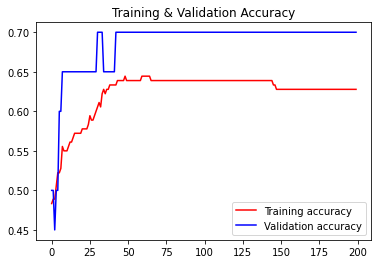

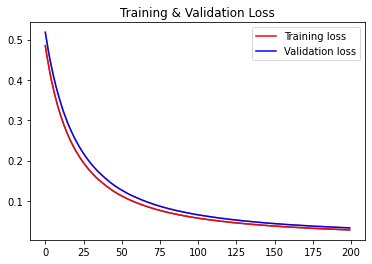

In [ ]:
# Menampilkan grafik selama pelatihan
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot training & validation accuracy per epoch
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training & Validation Accuracy')
plt.legend(loc=0)
plt.show()
print('\n')

# Plot training & validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training & Validation Loss')
plt.legend(loc=0)
plt.show()

## Evaluation

In [ ]:
# Evaluasi model
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.6954
loss: 2.98%
accuracy: 69.54%
